<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Импортируем-библиотеки" data-toc-modified-id="Импортируем-библиотеки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импортируем библиотеки</a></span></li><li><span><a href="#Изучаем-данные" data-toc-modified-id="Изучаем-данные-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучаем данные</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Составим-матрицу-признаков-и-вектор-целевого-признака" data-toc-modified-id="Составим-матрицу-признаков-и-вектор-целевого-признака-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Составим матрицу признаков и вектор целевого признака</a></span></li><li><span><a href="#Проверим-обратимость-матрицы" data-toc-modified-id="Проверим-обратимость-матрицы-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверим обратимость матрицы</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Ответ" data-toc-modified-id="Ответ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Ответ</a></span></li><li><span><a href="#Обоснование" data-toc-modified-id="Обоснование-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обоснование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

Нам нужно разработать и обосновать метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию клиентов страховой компании «Хоть потоп».  
Защитить данные нужно таким образом, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. При этом подбирать наилучшую модель не требуется.

## Загрузка данных

### Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Изучаем данные

In [2]:
try:
    df = pd.read_csv('/datasets/insurance.csv')
       
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


None

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


array([[<Axes: title={'center': 'Пол'}>,
        <Axes: title={'center': 'Возраст'}>],
       [<Axes: title={'center': 'Зарплата'}>,
        <Axes: title={'center': 'Члены семьи'}>],
       [<Axes: title={'center': 'Страховые выплаты'}>, <Axes: >]],
      dtype=object)

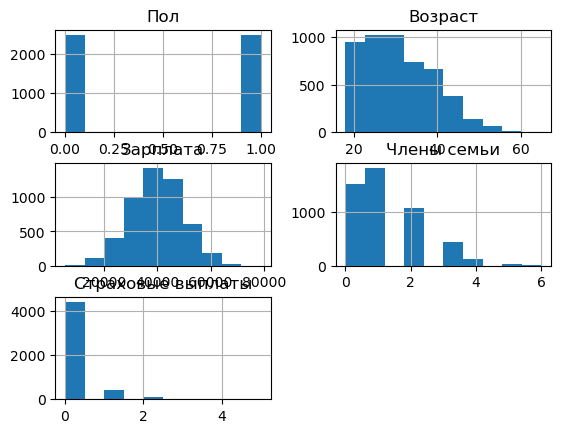

In [3]:
display(
    df.head(),
    df.info(),
    df.describe(include='all'),
    df.hist()
);

In [4]:
df['Возраст'] = df['Возраст'].astype('int')
df['Зарплата'] = df['Зарплата'].astype('int')

0    0.8872
1    0.0846
2    0.0230
3    0.0036
4    0.0014
5    0.0002
Name: Страховые выплаты, dtype: float64

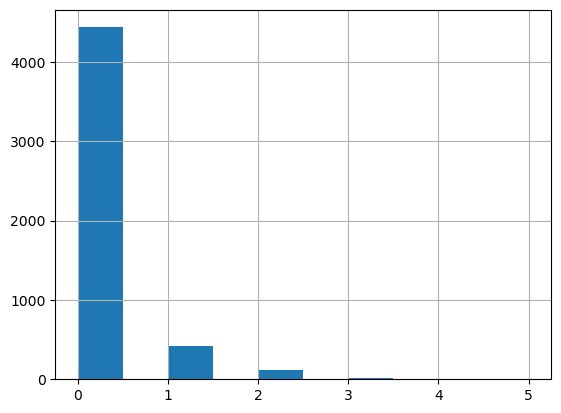

In [5]:
df['Страховые выплаты'].hist()
df['Страховые выплаты'].value_counts('normalize')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int32
 2   Зарплата           5000 non-null   int32
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int32(2), int64(3)
memory usage: 156.4 KB


### Вывод

Исходные данные представляют собой таблицу (5000 rows × 5 columns). Пропусков нет. Типы данных впорядке, на всякий случай переведем все значения в int64.  
Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.  
Целевой признак: количество страховых выплат клиенту за последние 5 лет.  
В целевом признаке присутствует дисбалланс.

In [7]:
df.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


**Вывод:** С помощью коэф корреляции Пирсона мы обнаружили корреляцию 2-х признаков: Страховые выплаты и Возраст. Коэф равен 0.65. Не имея практического опыта, трудно оценить достаточно ли этого значения, для того, чтобы говорить о корреляции 2-х признаков. Кто-то в интернете пишет, что значение более 0.7 уже достаточно, кто-то говорит, что достаточно больше 0.5. Допустим, что переменные коррелируют.

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif['variable'] = df.columns
vif

,VIF,variable
0,1.950884,Пол
1,12.171111,Возраст
2,10.131786,Зарплата
3,2.133779,Члены семьи
4,1.581746,Страховые выплаты


**Вывод:** Способ расчета коэфициента инфляции дисперсии (VIF) показал высокие значения у признаков Возраст и Зарплата, значит можно говорить о наличии мультиколлинеарности.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

### Составим матрицу признаков и вектор целевого признака

In [9]:
X = df.drop("Страховые выплаты", axis=1)
y = df["Страховые выплаты"]

X.shape, y.shape

((5000, 4), (5000,))

### Проверим обратимость матрицы

In [10]:
np.random.seed(12345)
INV = np.random.rand(4,4)
np.linalg.inv(INV)

array([[ 2.1336149 ,  0.5051926 , -1.71113385,  1.33832486],
       [-3.76534462, -2.61352053,  6.72316006, -6.07193701],
       [ 0.97426298,  2.9928115 , -3.49875049,  1.84220045],
       [ 0.13998298, -0.94454066,  0.52375812,  1.652661  ]])

Функция для обсчета коэффициента детерминации:

In [11]:
def r2_score(x, y):
    LR = LinearRegression()
    LR.fit(x, y)
    r2 = LR.score(x, y)
    return r2

R2 для обычной матрицы признаков:

In [12]:
r2_score(X, y)

0.42494550308169177

R2 для произведения матрицы признаков и квадратной обратимой матрицы:

In [13]:
P = X @ INV
r2_score(P, y)

0.42494550308174195

#### Вывод

Качество линейной регрессии не меняется при умножении матрицы признаков на квадратную обратимую матрицу

### Ответ

R2 не поменяется

### Обоснование

Докажем, что умножив марицу признаков на другую, у которой существует обратная и умножив на обратную получим исходную матрицу признаков.  
  
Запишем исходное уравнение весов:
$$
w = (X^T X)^{-1} X^{T} y
$$
  
В формулу вектора весов линейной регрессии $w$ подставляем произведение $XP$ вместо $X$. Получится выражение для $w’$.


$w’$ - вектор весов после преобразования,  
$P$ - обратимая квадратная матрица.  
  
$$
w' = ((X P)^{T} (X P))^{-1} (X P)^{T} y = (P^{T} X^{T} X P)^{-1} P^{T} X^{T} y = P^{-1} (X^{T} X)^{-1} P^{T^{-1}} P^{T} X^{T} y = P^{-1}(X^T X)^{-1} X^{T} y = P^{-1} w
$$

Таким образом мы нашли связь между **_w_** и **_w’_**. Теперь в формулу предсказания подставляем **_X*P_** вместо **_X_**, и **_w’_** вместо **_w_**

$$
a' = X P w' = X P P ^ {-1} w = X E w = X w = a
$$

Проверим на практике:

In [14]:
np.random.seed(12345)
check = []
for i in range(100):
    P = np.random.normal(10, 100, size=(4,4)).astype('int64')
    A = np.random.normal(10, 100, size=(4,4)).astype('int64')
    check.append(np.rint(A @ P @ np.linalg.inv(P)).astype('int64') == A)
print('Матрица признаков P:')
print(P)
print('Матрица преобразования А:')
print(A)
np.prod(np.array(check))

Матрица признаков P:
[[  -6   29   82   26]
 [ 237  -95   43 -167]
 [ 251   -4  195 -139]
 [ 139   13   52   78]]
Матрица преобразования А:
[[-72   7 138 -53]
 [214  41 -92  60]
 [-12  22 -44 100]
 [157  68 -47  45]]


1

### Вывод

Умножив марицу признаков на другую, у которой существует обратная и умножив на обратную получим исходную матрицу признаков.

## Алгоритм преобразования

Для шифрования воспользуемся квадратной обратимой матрицей - $P$, где $X P = Xcr$ - процесс шифрования, а $Xcr P^{-1} = X$.

Ранее мы уже обосновали возможность использования матрицы $P$ для шифрования исходной матрицы признаков.

## Проверка алгоритма

In [15]:
np.random.seed(12345)
try:
    P = np.linalg.inv(np.random.rand(4,4))
except numpy.linalg.LinAlgError:
    pass
else:
    X_cr = X @ P
    
X_cr.head()

,0,1,2,3
0,48171.338106,148335.856886,-173263.562169,91127.184099
1,36848.927240,113605.670650,-132642.729539,69725.960820
2,20350.327514,62773.249479,-73278.788670,38510.123366
3,40547.973852,124743.466685,-145755.661599,76695.553587
4,25324.967654,78039.706860,-91130.850469,47912.755944


In [16]:
r2_score(X_cr, y)

0.42494550308170065

### Вывод

Качество линейной регрессии до и после преобразования не изменилось.

## Общий вывод

Исходные данные представляют собой таблицу (5000 rows × 5 columns). Пропусков нет. Типы данных впорядке, на всякий случай перевели все значения в int64.  
Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.  
Целевой признак: количество страховых выплат клиенту за последние 5 лет.  
В целевом признаке присутствует дисбалланс.

Мы доказали, что качество линейной регрессии не меняется при умножении матрицы признаков на квадратную обратимую матрицу.

Мы доказали, что умножив марицу признаков на другую, у которой существует обратная и умножив на обратную получим исходную матрицу признаков.

Мы предложили алгоритм шифромания данных клиентов с помощью умножения матрицы признаков $X$ на квадратную обратимую матрицу $P$. И доказали, что качество линейной регрессии до и после преобразования не изменилось.